In [2]:
!pip3 install matplotlib

In [ ]:
!pip3 install torch torchvision opencv-headless-python

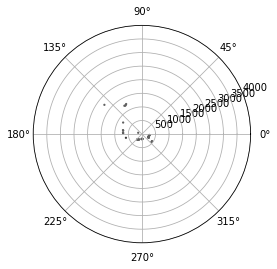

In [3]:
#!/usr/bin/env python3
'''Animates distances and measurment quality'''
from rplidar import RPLidar
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

PORT_NAME = '/dev/ttyUSB0'
DMAX = 4000
IMIN = 0
IMAX = 50

def update_line(num, iterator, line):
    scan = next(iterator)
    offsets = np.array([(np.radians(meas[1]), meas[2]) for meas in scan])
    line.set_offsets(offsets)
    intens = np.array([meas[0] for meas in scan])
    line.set_array(intens)
    return line,

def run():
    lidar = RPLidar(PORT_NAME)
    fig = plt.figure()
    ax = plt.subplot(111, projection='polar')
    line = ax.scatter([0, 0], [0, 0], s=5, c=[IMIN, IMAX],
                           cmap=plt.cm.Greys_r, lw=0)
    ax.set_rmax(DMAX)
    ax.grid(True)

    iterator = lidar.iter_scans()
    ani = animation.FuncAnimation(fig, update_line,
        fargs=(iterator, line), interval=50)
    plt.show()
    lidar.stop()
    lidar.disconnect()

if __name__ == '__main__':
    run()

In [7]:
#!/usr/bin/env python3
'''Records scans to a given file in the form of numpy array.
Usage example:

$ ./record_scans.py out.npy'''
import sys
import numpy as np
from rplidar import RPLidar


PORT_NAME = '/dev/ttyUSB0'


def run(path):
    '''Main function'''
    lidar = RPLidar(PORT_NAME)
    data = []
    try:
        print('Recording measurments... Press Crl+C to stop.')
        for scan in lidar.iter_scans():
            data.append(np.array(scan))
    except KeyboardInterrupt:
        print('Stoping.')
    lidar.stop()
    lidar.disconnect()
    np.save(path, np.array(data))

if __name__ == '__main__':
    run(sys.argv[1])

Recording measurments... Press Crl+C to stop.
Stoping.
